In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

In [62]:
df = pd.read_csv('Dataset_SKIN_EXAMEN_Final.csv', delimiter = ';', decimal = ',')

df

,AGE,Age_BIN,Ville,Cerne_Surface,Cerne_Haralick_Contraste,Cerne_Haralick_Entropie,Cerne_Rugosite_Rt,Cerne_Rugosite_Ra,Cerne_Orientation_Aniso,Cerne_H76,...,Paup_ITA,Paup_IWA,Paup_H76,Paup_Haralick_Contraste,Paup_Halarick_Entropie,Paup_Halarick_Rt,Paup_Halarick_Ra,Paup_Orientation_Aniso,Paup_Surf,Paup_Hauteur
0,25,L,Europe,71541.0,1.8669,5.6292,103.5,12.5397,8.9513,5.4579,...,44.7492,75.1704,7.1162,2.5630,5.9539,203.0,15.1434,9.3552,424069.5,446.5085
1,28,L,Europe,89193.5,4.2191,5.9259,96.5,11.7330,11.8962,4.2646,...,0.5550,61.7410,6.6843,10.8779,6.8301,210.0,16.9882,14.9127,493232.0,496.9325
2,57,H,Europe,44993.5,2.1424,5.3528,100.0,9.0888,7.7184,4.0401,...,42.4604,72.9530,7.6134,5.0513,6.2248,163.0,13.6760,11.7784,380649.0,427.0025
3,23,L,Europe,37159.5,3.3100,5.9635,112.0,12.3705,14.4397,3.8183,...,37.2925,73.6508,7.8988,7.6544,6.5372,215.0,18.0385,9.2540,442697.0,459.0190
4,55,H,Europe,182202.5,3.8090,6.0859,104.5,12.0235,10.8535,5.8068,...,27.0483,69.4875,8.9338,6.8041,6.5861,203.5,16.2301,10.6475,396187.0,433.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,58,H,Shangai,79881.5,7.8976,6.4934,121.0,12.6881,7.9492,5.0041,...,-22.5923,54.6670,7.4186,14.1595,7.0426,204.5,17.5427,15.4597,369427.5,377.5360
246,59,H,Shenzen,22257.5,4.6232,5.8537,117.0,9.4606,9.9207,4.1151,...,17.7227,63.1220,6.4908,13.1179,6.8222,214.0,16.9821,15.7685,476262.0,468.7090
247,57,H,Shangai,67730.5,5.8096,6.1625,113.0,10.7707,8.8858,4.6609,...,9.3687,57.3442,6.1580,6.5920,6.3345,195.5,13.2818,10.3541,419504.0,423.2240
248,59,H,Shangai,0.0,4.8244,5.8134,127.0,8.0854,9.0966,0.0000,...,6.7732,57.6021,5.6482,8.8768,6.4174,199.5,12.7726,14.3511,347327.5,347.1360


In [63]:
df.dtypes

AGE                           int64
Age_BIN                      object
Ville                        object
Cerne_Surface               float64
Cerne_Haralick_Contraste    float64
Cerne_Haralick_Entropie     float64
Cerne_Rugosite_Rt           float64
Cerne_Rugosite_Ra           float64
Cerne_Orientation_Aniso     float64
Cerne_H76                   float64
Cerne_Contraste_dL          float64
Cerne_Contraste_da          float64
Cerne_Contraste_db          float64
Cerne_Contraste_dC          float64
Cerne_Contraste_dh          float64
Cerne_Contraste_dITA        float64
Cerne_Contraste_dIWA        float64
Cerne_Peau_L                float64
Cerne_Peau_a                float64
Cerne_Peau_b                float64
Cerne_Peau_c                float64
Cerne_Peau_h                float64
Cerne_Peau_ITA              float64
Cerne_Peau_IWA              float64
Cerne_L                     float64
Cerne_a                     float64
Cerne_b                     float64
Cerne_c                     

In [64]:
df = df.set_index(['Ville', 'AGE', 'Age_BIN'])

df

Cerne_Surface  Cerne_Haralick_Contraste  \
Ville   AGE Age_BIN                                            
Europe  25  L              71541.0                    1.8669   
        28  L              89193.5                    4.2191   
        57  H              44993.5                    2.1424   
        23  L              37159.5                    3.3100   
        55  H             182202.5                    3.8090   
...                            ...                       ...   
Shangai 58  H              79881.5                    7.8976   
Shenzen 59  H              22257.5                    4.6232   
Shangai 57  H              67730.5                    5.8096   
        59  H                  0.0                    4.8244   
        24  L              45578.0                    3.0343   

                     Cerne_Haralick_Entropie  Cerne_Rugosite_Rt  \
Ville   AGE Age_BIN                                               
Europe  25  L                         5.6292              103.5   
        28  L                         5.9259               96.5   
        57  H                         5.3528              100.0   
        23  L                         5.9635              112.0   
        55  H                         6.0859              104.5   
...                                      ...                ...   
Shangai 58  H                         6.4934              121.0   
Shenzen 59  H                         5.8537              117.0   
Shangai 57  H                         6.1625              113.0   
        59  H                         5.8134              127.0   
        24  L                         5.4643               74.0   

                     Cerne_Rugosite_Ra  Cerne_Orientation_Aniso  Cerne_H76  \
Ville   AGE Age_BIN                                                          
Europe  25  L                  12.5397                   8.9513     5.4579   
        28  L                  11.7330                  11.8962     4.2646   
        57  H                   9.0888                   7.7184     4.0401   
        23  L                  12.3705                  14.4397     3.8183   
        55  H                  12.0235                  10.8535     5.8068   
...                                ...                      ...        ...   
Shangai 58  H                  12.6881                   7.9492     5.0041   
Shenzen 59  H                   9.4606                   9.9207     4.1151   
Shangai 57  H                  10.7707                   8.8858     4.6609   
        59  H                   8.0854                   9.0966     0.0000   
        24  L                   7.7348                  11.3514     3.2186   

                     Cerne_Contraste_dL  Cerne_Contraste_da  \
Ville   AGE Age_BIN                                           
Europe  25  L                   14.4782              1.3230   
        28  L                   18.2627              0.9105   
        57  H                   12.1515              3.4334   
        23  L                   15.1668              1.8477   
        55  H                    9.9939              0.9198   
...                                 ...                 ...   
Shangai 58  H                   20.5832              0.9763   
Shenzen 59  H                   20.0899              4.4449   
Shangai 57  H                   14.8233              3.2078   
        59  H                    0.0000              0.0000   
        24  L                    9.1244              1.7223   

                     Cerne_Contraste_db  ...  Paup_ITA  Paup_IWA  Paup_H76  \
Ville   AGE Age_BIN                      ...                                 
Europe  25  L                    2.1989  ...   44.7492   75.1704    7.1162   
        28  L                    2.0810  ...    0.5550   61.7410    6.6843   
        57  H                    3.0932  ...   42.4604   72.9530    7.6134   
        23  L                    0.5061  ...   37.2925   73.6508    7.8988   
        55  H

In [65]:
df.dtypes

Cerne_Surface               float64
Cerne_Haralick_Contraste    float64
Cerne_Haralick_Entropie     float64
Cerne_Rugosite_Rt           float64
Cerne_Rugosite_Ra           float64
Cerne_Orientation_Aniso     float64
Cerne_H76                   float64
Cerne_Contraste_dL          float64
Cerne_Contraste_da          float64
Cerne_Contraste_db          float64
Cerne_Contraste_dC          float64
Cerne_Contraste_dh          float64
Cerne_Contraste_dITA        float64
Cerne_Contraste_dIWA        float64
Cerne_Peau_L                float64
Cerne_Peau_a                float64
Cerne_Peau_b                float64
Cerne_Peau_c                float64
Cerne_Peau_h                float64
Cerne_Peau_ITA              float64
Cerne_Peau_IWA              float64
Cerne_L                     float64
Cerne_a                     float64
Cerne_b                     float64
Cerne_c                     float64
Cerne_h                     float64
Cerne_ITA                   float64
Cerne_IWA                   

In [66]:
df.isnull().sum()

Cerne_Surface               0
Cerne_Haralick_Contraste    0
Cerne_Haralick_Entropie     0
Cerne_Rugosite_Rt           0
Cerne_Rugosite_Ra           0
Cerne_Orientation_Aniso     0
Cerne_H76                   0
Cerne_Contraste_dL          0
Cerne_Contraste_da          0
Cerne_Contraste_db          0
Cerne_Contraste_dC          0
Cerne_Contraste_dh          0
Cerne_Contraste_dITA        0
Cerne_Contraste_dIWA        0
Cerne_Peau_L                0
Cerne_Peau_a                0
Cerne_Peau_b                0
Cerne_Peau_c                0
Cerne_Peau_h                0
Cerne_Peau_ITA              0
Cerne_Peau_IWA              0
Cerne_L                     0
Cerne_a                     0
Cerne_b                     0
Cerne_c                     0
Cerne_h                     0
Cerne_ITA                   0
Cerne_IWA                   0
Paup_L                      0
Paup_a                      0
Paup_b                      0
Paup_c                      0
Paup_h                      0
Paup_ITA  

In [67]:
def co(df):
    corr = df.corr()
    cor = corr.round(2)
    f, ax = plt.subplots(figsize = (17,16))
    sns.heatmap(cor, cmap = 'Blues', annot = True)
    
    plt.show()


In [75]:
def scaler(df):
    ss = StandardScaler()
    ss.fit(df)
    dfss = ss.transform(df)
    
    print('StandardScaler', '\n', np.mean(dfss))
    print(np.std(dfss))
    
    rb = RobustScaler()
    rb.fit(df)
    dfrb = rb.transform(df)
    
    print('\n', 'RobustScaler', '\n', np.mean(dfrb))
    print(np.std(dfrb))
    
    print('\n', '\n', 'On choisira le StandarScaler car il mieux centre et normaliser')
    
    dfs = pd.DataFrame(dfss, columns = df.columns)
    dfs

#### On choisira le StandarScaler car il mieux centre et normaliser

In [69]:

dfs = pd.DataFrame(dfss, columns = df.columns)
dfs

# PCA

In [18]:
acp = PCA(svd_solver = 'full')
print(acp)

PCA(svd_solver='full')


In [77]:
def pca(dfs):
    coord = acp.fit_transform(dfs)
    
    print(acp.n_components_, ' composants')
    print('\n','\n')
    
    print(acp.explained_variance_ratio_, '\n')
    print(acp.explained_variance_)
    
    val_propre = acp.explained_variance_
    
    f, ax = plt.subplots(figsize = (17,16))
    plt.xticks(np.arange(0, len(val_propre), step=1))
    plt.plot(np.arange(43), val_propre)
    plt.xlabel('CP')
    plt.ylabel('valeur propre')    
    
    plt.show()

#### selection du nombre de composant selon le gain d'information

[2.68721286e-01 2.02640156e-01 1.33257729e-01 5.77301327e-02
 5.03546009e-02 4.64780971e-02 3.05376605e-02 2.94044658e-02
 2.80610011e-02 2.01619682e-02 1.91731457e-02 1.65991101e-02
 1.47941439e-02 1.45088142e-02 1.23732318e-02 1.04051967e-02
 8.46506649e-03 6.06970185e-03 5.72666589e-03 5.01493278e-03
 3.99766997e-03 3.02878747e-03 2.17287684e-03 1.99053578e-03
 1.46270747e-03 1.30792174e-03 1.11360601e-03 1.01544015e-03
 8.65870152e-04 8.04710915e-04 6.64683842e-04 4.68785769e-04
 2.20391146e-04 1.54324636e-04 1.13915506e-04 4.97687448e-05
 3.03240602e-05 2.70415503e-05 1.52627092e-05 8.64101953e-06
 5.84098014e-06 2.83104404e-06 9.55603173e-07] 

[1.16014210e+01 8.74852080e+00 5.75309472e+00 2.49236516e+00
 2.17394361e+00 2.00658452e+00 1.31839297e+00 1.26946991e+00
 1.21146892e+00 8.70446420e-01 8.27756289e-01 7.16628246e-01
 6.38702999e-01 6.26384550e-01 5.34185712e-01 4.49220339e-01
 3.65459698e-01 2.62045361e-01 2.47235575e-01 2.16508142e-01
 1.72590169e-01 1.30760905e-01 9.380

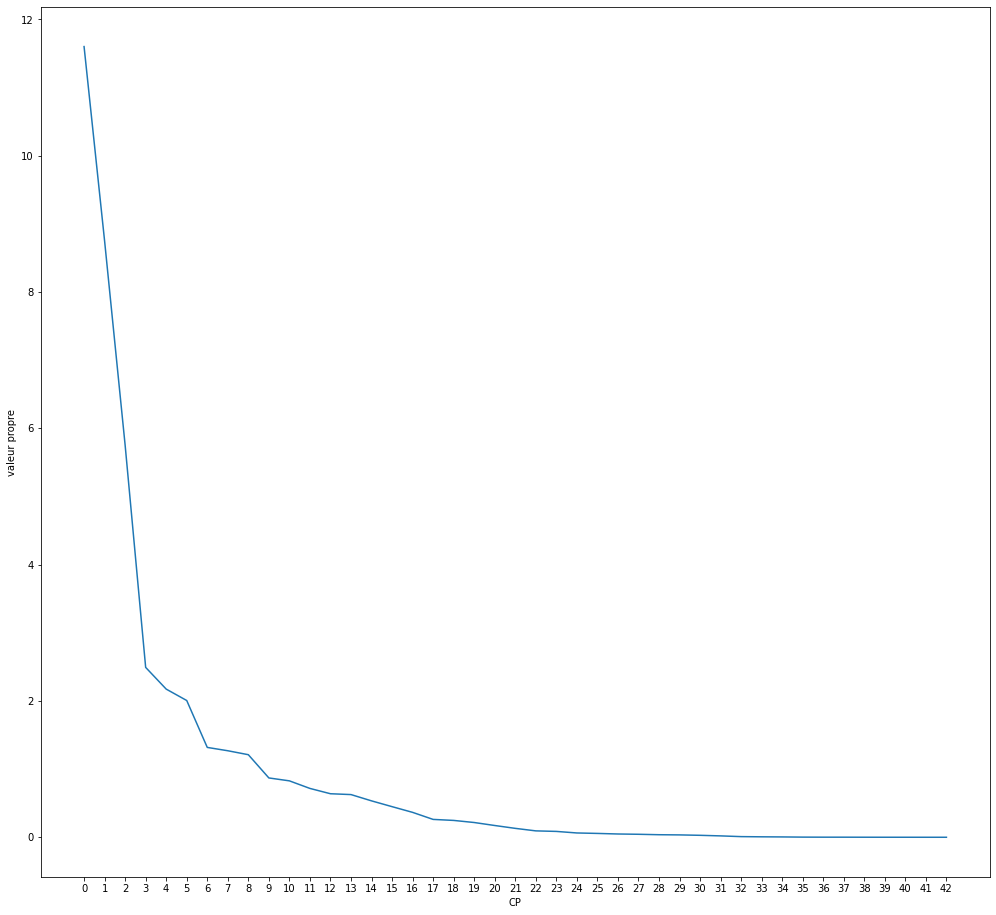

In [25]:
print(acp.explained_variance_ratio_, '\n')
print(acp.explained_variance_)

val_propre = acp.explained_variance_

f, ax = plt.subplots(figsize = (17,16))
plt.xticks(np.arange(0, len(val_propre), step=1))
plt.plot(np.arange(43), val_propre)
plt.xlabel('CP')
plt.ylabel('valeur propre')

plt.show()

In [81]:
def pca_2(dfs,n):
    acp2 = PCA(n_components = n, svd_solver = 'full')
    crd = acp2.fit_transform(dfs)
    
    print(crd,'\n')
    
    cp_cols = ['CP'+ str(i+1) for i in range(crd.shape[1])]
    crd_df = pd.DataFrame(crd, columns = cp_cols, index = dfs.index)
    
    print(crd_df)

In [30]:
cp_cols = ['CP'+ str(i+1) for i in range(crd.shape[1])]
crd_df = pd.DataFrame(crd, columns = cp_cols, index = dfs.index)

crd_df

,CP1,CP2,CP3
0,-6.181242,1.221305,0.652416
1,-0.368021,-1.136265,-1.769595
2,-5.507326,1.426939,0.705268
3,-5.040964,0.842429,-1.580789
4,-3.489418,-0.229697,-2.697614
...,...,...,...
245,5.247332,-2.744848,-3.510648
246,0.286121,-2.222454,2.022600
247,2.069183,-2.057431,1.177068
248,4.624563,6.482735,-2.029186


# Kmeans

In [83]:
def kms(crd):
    res = [] 
    wcss = []

    max_cluster = 50

    range_cluster = range(2, max_cluster)
    for k in range_cluster:   
        km = KMeans(n_clusters = k, init = 'k-means++', n_init = 10) 
        km.fit(crd) 
        res.append(metrics.silhouette_score(crd,km.labels_) )
        wcss.append(km.inertia_)

    f, ax = plt.subplots(figsize = (8, 8))
    plt.xticks(np.arange(0, len(range_cluster), step=1))     
    plt.plot(np.arange(2, max_cluster),res) 
    plt.title('Silhouette')
    plt.xlabel('Nombre de cluster')
    plt.ylabel('Coefficient de silhouette')
    plt.show() 

    f, ax = plt.subplots(figsize = (8, 8))
    plt.xticks(np.arange(0, len(range_cluster), step=1))   
    plt.plot(np.arange(2, max_cluster, 1),wcss) 
    plt.title("Inertie")
    plt.xlabel("Nombre de cluster")
    plt.ylabel('Coefficient inertie')
    plt.show() 

#### 4 cluster me semble le plus adequoi car son scores silhouette et le plus proche de 0.5 (on aurait aimer que 0.5 soit depasser) et son coefficient d'inertie est assez bas il serait aussi interessant observer 8 groupe par contre plus d'overlappin seront present

In [88]:
def kms_2(crd, n, m):
    nbr_cluster = n

    km1 = KMeans(n_clusters=nbr_cluster, n_init=10, max_iter=100) 
    km1.fit(crd) 
    km1.labels_
    cluster_4 = km1.fit_predict(crd)

    df_4 = df.copy()
    df_4['cluster'] = cluster_4

    display(df_4)
    
    nbr_cluster = m

    km2 = KMeans(n_clusters=nbr_cluster, n_init=10, max_iter=100) 
    km2.fit(crd) 
    km2.labels_
    cluster_8 = km2.fit_predict(crd)

    df_8 = df.copy()
    df_8['cluster'] = cluster_8

    display(df_8)

In [41]:
nbr_cluster = 8

km2 = KMeans(n_clusters=nbr_cluster, n_init=10, max_iter=100) 
km2.fit(crd) 
km2.labels_
cluster_8 = km2.fit_predict(crd)

df_8 = df.copy()
df_8['cluster'] = cluster_8

df_8

Cerne_Surface  Cerne_Haralick_Contraste  \
Ville   AGE Age_BIN                                            
Europe  25  L              71541.0                    1.8669   
        28  L              89193.5                    4.2191   
        57  H              44993.5                    2.1424   
        23  L              37159.5                    3.3100   
        55  H             182202.5                    3.8090   
...                            ...                       ...   
Shangai 58  H              79881.5                    7.8976   
Shenzen 59  H              22257.5                    4.6232   
Shangai 57  H              67730.5                    5.8096   
        59  H                  0.0                    4.8244   
        24  L              45578.0                    3.0343   

                     Cerne_Haralick_Entropie  Cerne_Rugosite_Rt  \
Ville   AGE Age_BIN                                               
Europe  25  L                         5.6292              103.5   
        28  L                         5.9259               96.5   
        57  H                         5.3528              100.0   
        23  L                         5.9635              112.0   
        55  H                         6.0859              104.5   
...                                      ...                ...   
Shangai 58  H                         6.4934              121.0   
Shenzen 59  H                         5.8537              117.0   
Shangai 57  H                         6.1625              113.0   
        59  H                         5.8134              127.0   
        24  L                         5.4643               74.0   

                     Cerne_Rugosite_Ra  Cerne_Orientation_Aniso  Cerne_H76  \
Ville   AGE Age_BIN                                                          
Europe  25  L                  12.5397                   8.9513     5.4579   
        28  L                  11.7330                  11.8962     4.2646   
        57  H                   9.0888                   7.7184     4.0401   
        23  L                  12.3705                  14.4397     3.8183   
        55  H                  12.0235                  10.8535     5.8068   
...                                ...                      ...        ...   
Shangai 58  H                  12.6881                   7.9492     5.0041   
Shenzen 59  H                   9.4606                   9.9207     4.1151   
Shangai 57  H                  10.7707                   8.8858     4.6609   
        59  H                   8.0854                   9.0966     0.0000   
        24  L                   7.7348                  11.3514     3.2186   

                     Cerne_Contraste_dL  Cerne_Contraste_da  \
Ville   AGE Age_BIN                                           
Europe  25  L                   14.4782              1.3230   
        28  L                   18.2627              0.9105   
        57  H                   12.1515              3.4334   
        23  L                   15.1668              1.8477   
        55  H                    9.9939              0.9198   
...                                 ...                 ...   
Shangai 58  H                   20.5832              0.9763   
Shenzen 59  H                   20.0899              4.4449   
Shangai 57  H                   14.8233              3.2078   
        59  H                    0.0000              0.0000   
        24  L                    9.1244              1.7223   

                     Cerne_Contraste_db  ...  Paup_IWA  Paup_H76  \
Ville   AGE Age_BIN                      ...                       
Europe  25  L                    2.1989  ...   75.1704    7.1162   
        28  L                    2.0810  ...   61.7410    6.6843   
        57  H                    3.0932  ...   72.9530    7.6134   
        23  L                    0.5061  ...   73.6508    7.8988   
        55  H                    0.4292  ...   69.4875    8.9338   
...  

# CAH

In [110]:
def cah(crb, df1):
    ca = linkage(crd, method = 'ward', metric = 'euclidean')

    c, coph_dists = cophenet(ca, pdist(crd))
    print(c)
    
    plt.figure(figsize=(17, 17))
    dendrogram(ca, labels = df1.index, orientation = 'left', color_threshold = 30)
    plt.show()
    
    plt.figure(figsize=(17, 17))
    dendrogram(ca, labels = df1.index, orientation = 'left', color_threshold = 15)

    plt.show()
    

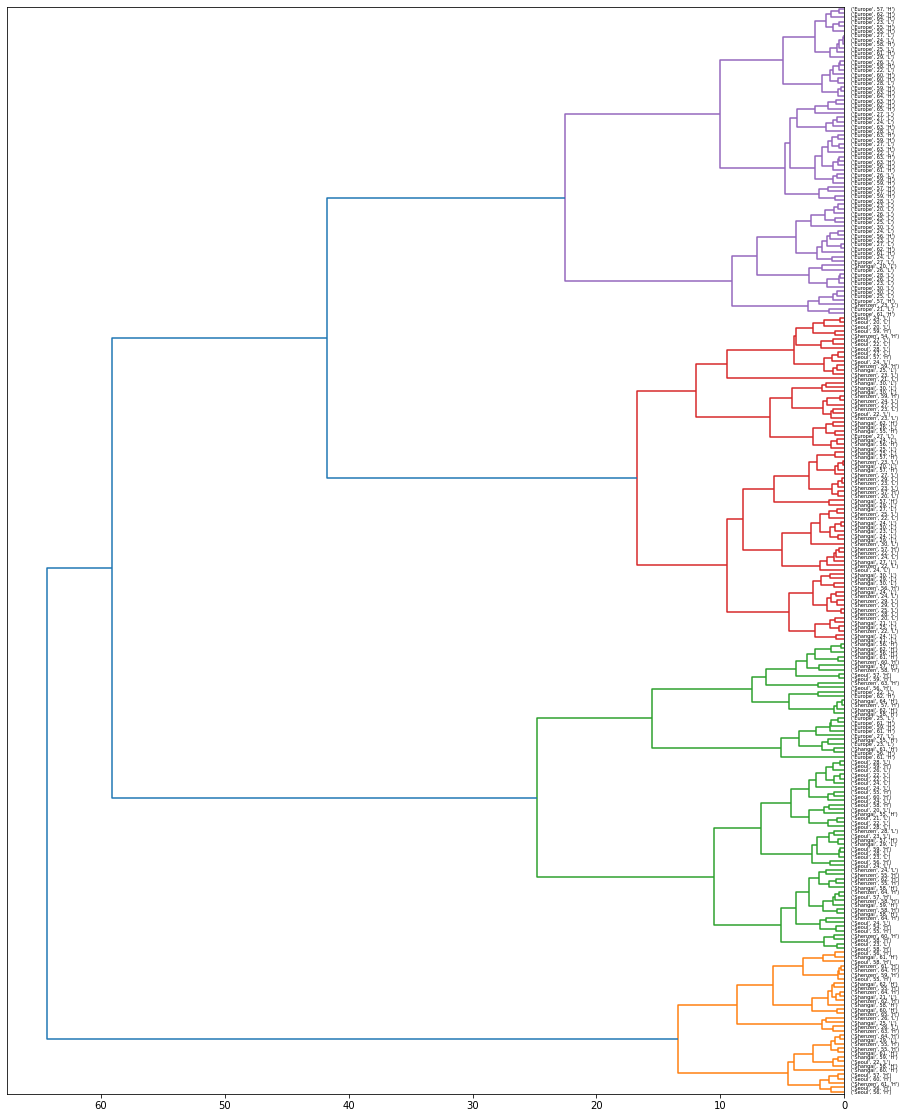

In [48]:
plt.figure(figsize=(15, 20))
dendrogram(cah, labels=df.index, orientation = 'left', color_threshold = 30)

plt.show()

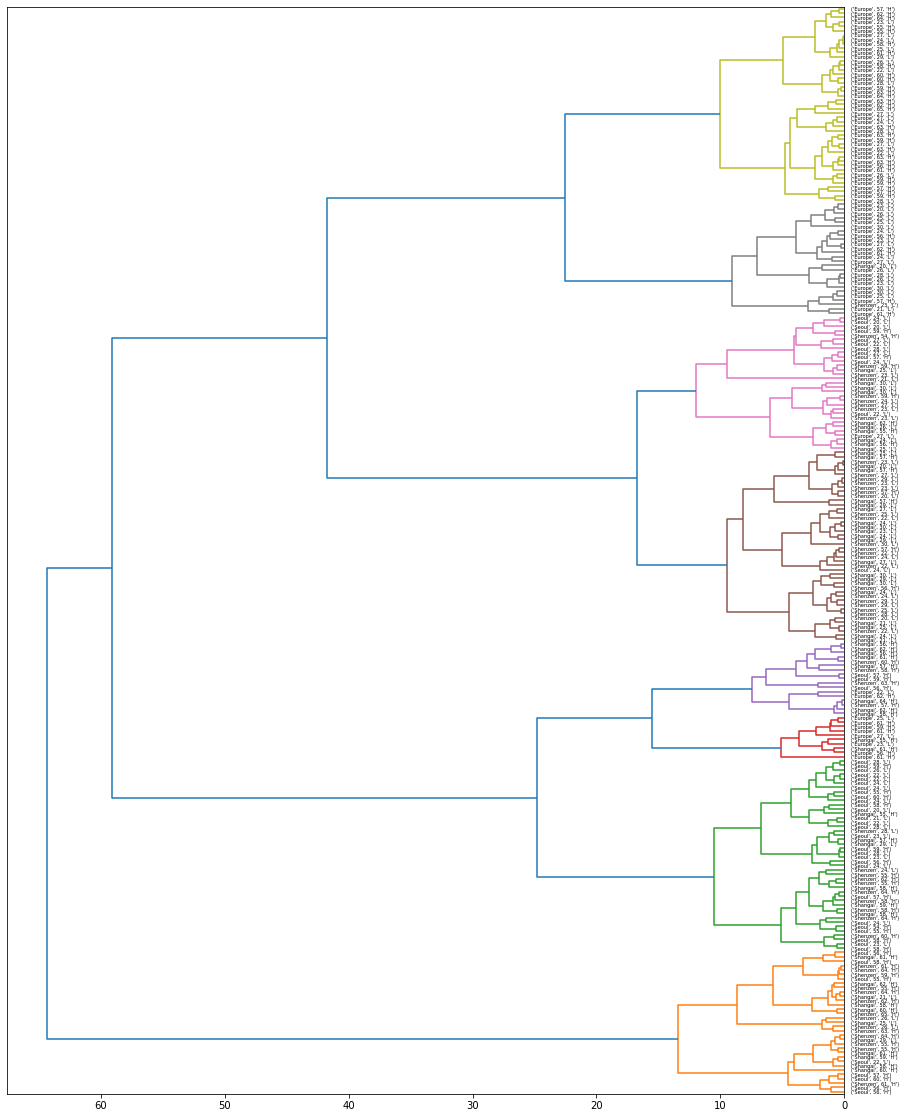

In [49]:
plt.figure(figsize=(15, 20))
dendrogram(cah, labels=df.index, orientation = 'left', color_threshold = 15)

plt.show()

# caucasiennes

In [153]:
#groups = df.groupby(df.Ville)

caucasiennes = df.loc['Europe']

caucasiennes

,,Cerne_Surface,Cerne_Haralick_Contraste,Cerne_Haralick_Entropie,Cerne_Rugosite_Rt,Cerne_Rugosite_Ra,Cerne_Orientation_Aniso,Cerne_H76,Cerne_Contraste_dL,Cerne_Contraste_da,Cerne_Contraste_db,...,Paup_ITA,Paup_IWA,Paup_H76,Paup_Haralick_Contraste,Paup_Halarick_Entropie,Paup_Halarick_Rt,Paup_Halarick_Ra,Paup_Orientation_Aniso,Paup_Surf,Paup_Hauteur
AGE,Age_BIN,,,,,,,,,,,,,,,,,,,,,
25,L,71541.0,1.8669,5.6292,103.5,12.5397,8.9513,5.4579,14.4782,1.3230,2.1989,...,44.7492,75.1704,7.1162,2.5630,5.9539,203.0,15.1434,9.3552,424069.5,446.5085
28,L,89193.5,4.2191,5.9259,96.5,11.7330,11.8962,4.2646,18.2627,0.9105,2.0810,...,0.5550,61.7410,6.6843,10.8779,6.8301,210.0,16.9882,14.9127,493232.0,496.9325
57,H,44993.5,2.1424,5.3528,100.0,9.0888,7.7184,4.0401,12.1515,3.4334,3.0932,...,42.4604,72.9530,7.6134,5.0513,6.2248,163.0,13.6760,11.7784,380649.0,427.0025
23,L,37159.5,3.3100,5.9635,112.0,12.3705,14.4397,3.8183,15.1668,1.8477,0.5061,...,37.2925,73.6508,7.8988,7.6544,6.5372,215.0,18.0385,9.2540,442697.0,459.0190
55,H,182202.5,3.8090,6.0859,104.5,12.0235,10.8535,5.8068,9.9939,0.9198,0.4292,...,27.0483,69.4875,8.9338,6.8041,6.5861,203.5,16.2301,10.6475,396187.0,433.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,L,27531.5,2.5840,5.5981,85.0,9.4721,10.7302,3.5419,9.7104,7.1724,5.3430,...,52.6417,75.3033,7.0042,6.7438,6.3540,219.0,14.7484,13.8881,454476.0,471.2955
59,H,205911.0,5.1104,6.4941,128.5,17.7782,8.2006,6.8794,15.6721,1.0142,1.5425,...,14.9265,65.8800,7.8802,8.0988,6.6241,207.0,17.8464,13.3963,465377.0,476.9105
64,H,157974.5,4.0685,6.1706,161.5,15.5028,10.2078,7.2083,14.7867,2.0751,3.3228,...,30.2625,72.5914,8.1620,6.7697,6.5923,209.0,15.6847,14.4025,443034.5,470.5545


In [154]:
caucasiennes.dtypes

Cerne_Surface               float64
Cerne_Haralick_Contraste    float64
Cerne_Haralick_Entropie     float64
Cerne_Rugosite_Rt           float64
Cerne_Rugosite_Ra           float64
Cerne_Orientation_Aniso     float64
Cerne_H76                   float64
Cerne_Contraste_dL          float64
Cerne_Contraste_da          float64
Cerne_Contraste_db          float64
Cerne_Contraste_dC          float64
Cerne_Contraste_dh          float64
Cerne_Contraste_dITA        float64
Cerne_Contraste_dIWA        float64
Cerne_Peau_L                float64
Cerne_Peau_a                float64
Cerne_Peau_b                float64
Cerne_Peau_c                float64
Cerne_Peau_h                float64
Cerne_Peau_ITA              float64
Cerne_Peau_IWA              float64
Cerne_L                     float64
Cerne_a                     float64
Cerne_b                     float64
Cerne_c                     float64
Cerne_h                     float64
Cerne_ITA                   float64
Cerne_IWA                   

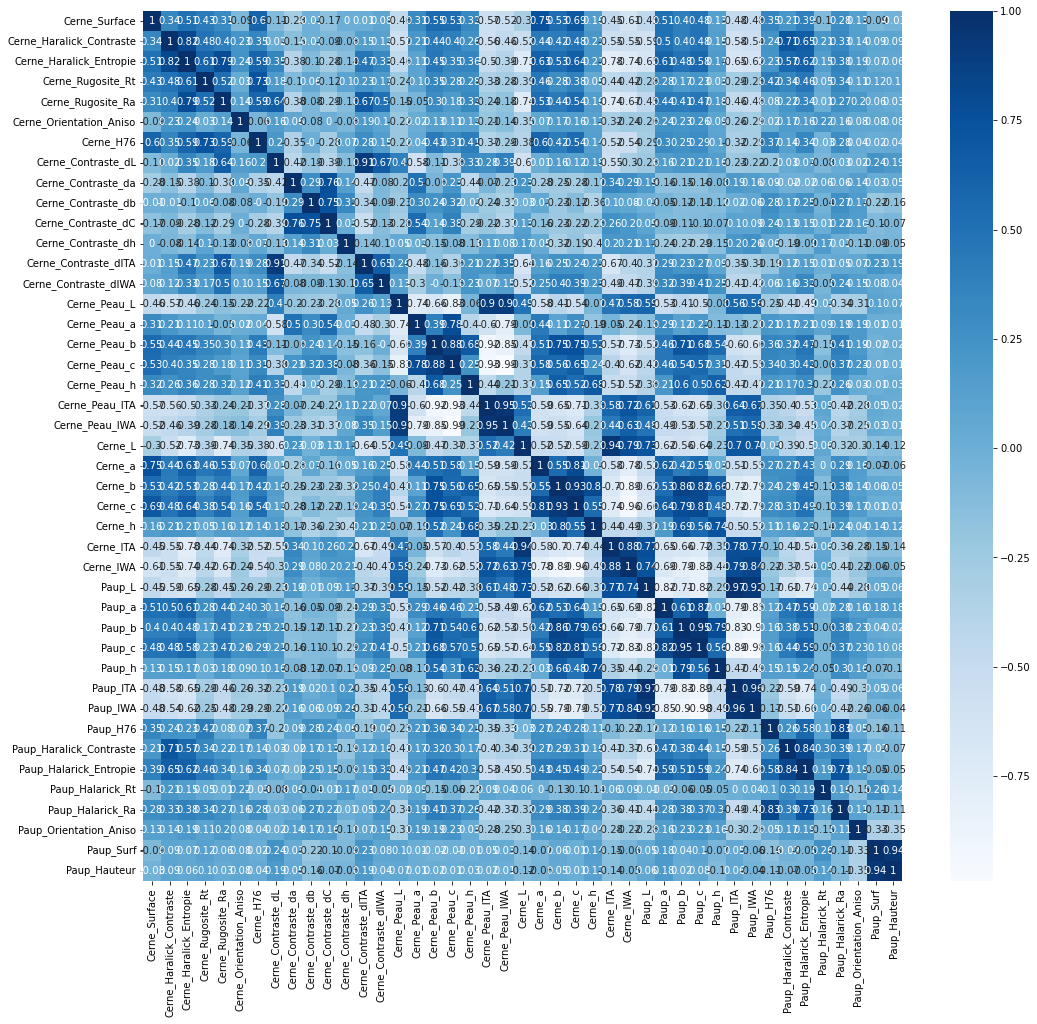

StandardScaler 
 -1.321939973507163e-16
1.0

 RobustScaler 
 0.025828801837188976
0.803980588781755

 
 On choisira le StandarScaler car il mieux centre et normaliser


In [155]:
co(caucasiennes)
scaler(caucasiennes)

In [156]:
dfs

,Cerne_Surface,Cerne_Haralick_Contraste,Cerne_Haralick_Entropie,Cerne_Rugosite_Rt,Cerne_Rugosite_Ra,Cerne_Orientation_Aniso,Cerne_H76,Cerne_Contraste_dL,Cerne_Contraste_da,Cerne_Contraste_db,...,Paup_ITA,Paup_IWA,Paup_H76,Paup_Haralick_Contraste,Paup_Halarick_Entropie,Paup_Halarick_Rt,Paup_Halarick_Ra,Paup_Orientation_Aniso,Paup_Surf,Paup_Hauteur
0,0.182657,-1.659956,-0.595399,-0.417766,0.610207,-0.883068,0.791600,0.423633,-0.495956,-0.166888,...,1.866349,1.785483,-0.163155,-2.155245,-2.165820,-0.291677,-0.629125,-1.287108,0.431223,0.621084
1,0.545790,-0.222934,0.005906,-0.750307,0.324811,0.411112,0.152091,1.049228,-0.716919,-0.222883,...,-1.354583,-0.397730,-0.538769,0.925789,1.109070,0.258361,0.081215,0.614962,1.512918,1.601163
2,-0.363455,-1.491646,-1.155562,-0.584037,-0.610662,-1.424884,0.031778,0.039020,0.634516,0.257843,...,1.699538,1.425001,0.269248,-1.233221,-1.153302,-3.434752,-1.194147,-0.457761,-0.247869,0.241951
3,-0.524609,-0.778328,0.082107,-0.013967,0.550347,1.528891,-0.087088,0.537462,-0.214891,-0.970853,...,1.322895,1.538442,0.517454,-0.268659,0.014325,0.651245,0.485633,-1.321744,0.722556,0.864248
4,2.459091,-0.473475,0.330168,-0.370260,0.427585,-0.047118,0.978581,-0.317641,-0.711937,-1.007375,...,0.576284,0.861616,1.417571,-0.583732,0.197094,-0.252389,-0.210691,-0.844815,-0.004856,0.373683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.354231,2.024360,1.156024,0.413586,0.662709,-1.323456,0.548401,1.432816,-0.681672,-0.766870,...,-3.041589,-1.547747,0.099835,2.141765,1.903311,-0.173812,0.294726,0.802175,-0.423372,-0.719517
246,-0.831160,0.023941,-0.140418,0.223562,-0.479125,-0.457051,0.071972,1.351272,1.176344,1.012462,...,-0.103378,-0.173221,-0.707052,1.755807,1.079543,0.572668,0.078867,0.907862,1.247509,1.052590
247,0.104271,0.748745,0.485409,0.033539,-0.015635,-0.911853,0.364475,0.480680,0.513670,0.909924,...,-0.712229,-1.112516,-0.996481,-0.662324,-0.743287,-0.881004,-1.345934,-0.945232,0.359819,0.168509
248,-1.289022,0.146860,-0.222091,0.698621,-0.965648,-0.819214,-2.133377,-1.969675,-1.204644,-1.211216,...,-0.901392,-1.070589,-1.439842,0.184294,-0.433440,-0.566696,-1.542001,0.422753,-0.769014,-1.310394


In [157]:
cs = dfs

43  composants

 

[2.68721286e-01 2.02640156e-01 1.33257729e-01 5.77301327e-02
 5.03546009e-02 4.64780971e-02 3.05376605e-02 2.94044658e-02
 2.80610011e-02 2.01619682e-02 1.91731457e-02 1.65991101e-02
 1.47941439e-02 1.45088142e-02 1.23732318e-02 1.04051967e-02
 8.46506649e-03 6.06970185e-03 5.72666589e-03 5.01493278e-03
 3.99766997e-03 3.02878747e-03 2.17287684e-03 1.99053578e-03
 1.46270747e-03 1.30792174e-03 1.11360601e-03 1.01544015e-03
 8.65870152e-04 8.04710915e-04 6.64683842e-04 4.68785769e-04
 2.20391146e-04 1.54324636e-04 1.13915506e-04 4.97687448e-05
 3.03240602e-05 2.70415503e-05 1.52627092e-05 8.64101953e-06
 5.84098014e-06 2.83104404e-06 9.55603173e-07] 

[1.16014210e+01 8.74852080e+00 5.75309472e+00 2.49236516e+00
 2.17394361e+00 2.00658452e+00 1.31839297e+00 1.26946991e+00
 1.21146892e+00 8.70446420e-01 8.27756289e-01 7.16628246e-01
 6.38702999e-01 6.26384550e-01 5.34185712e-01 4.49220339e-01
 3.65459698e-01 2.62045361e-01 2.47235575e-01 2.16508142e-01
 1.72590169e-01 1

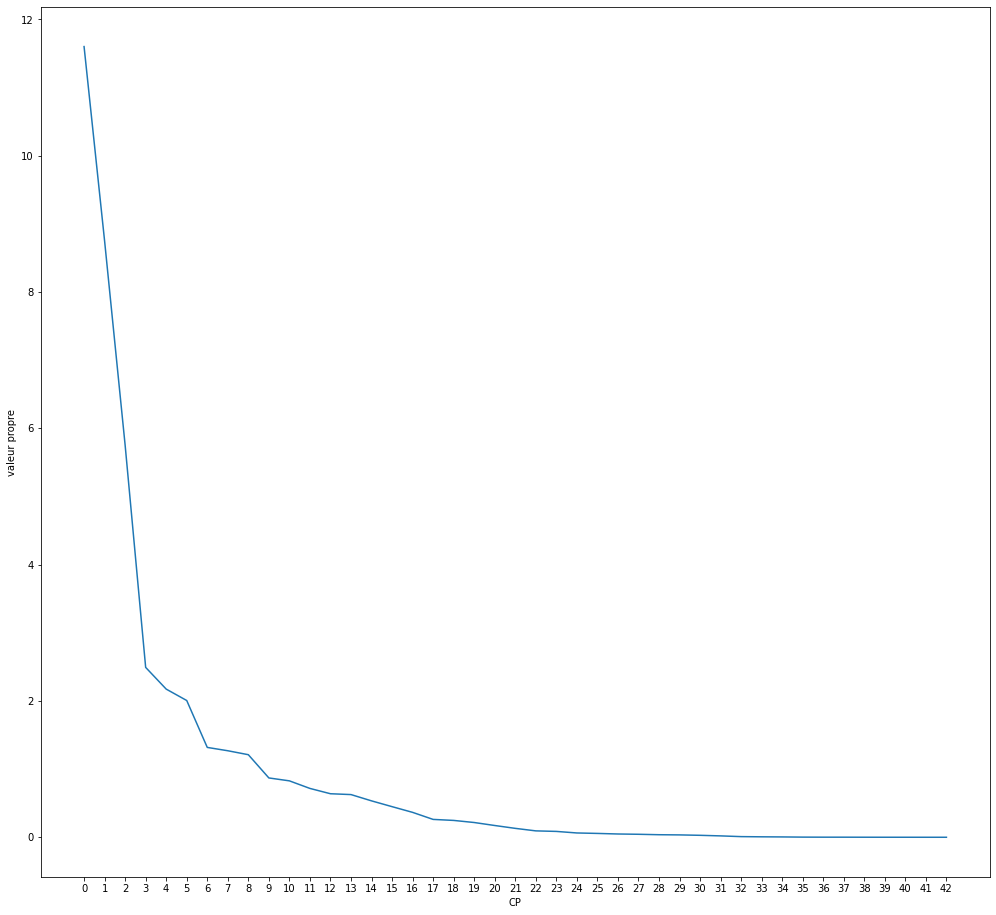

In [158]:
pca(cs)

#### selection du nombre de composant selon le gain d'information

In [159]:
pca_2(cs,3)

[[-6.18124186e+00  1.22130454e+00  6.52415701e-01]
 [-3.68021370e-01 -1.13626506e+00 -1.76959487e+00]
 [-5.50732646e+00  1.42693864e+00  7.05267727e-01]
 [-5.04096411e+00  8.42429253e-01 -1.58078890e+00]
 [-3.48941806e+00 -2.29696949e-01 -2.69761359e+00]
 [-3.46331807e+00 -1.34646850e+00 -3.17955804e+00]
 [-1.16938328e+00 -3.49420953e-01 -1.40065298e+00]
 [ 3.33744946e+00 -2.59919810e+00 -4.91944864e+00]
 [-3.01335462e+00 -1.70708157e+00 -1.80866594e+00]
 [-6.10511172e-02 -4.09188100e-01 -7.14397761e-01]
 [-3.88345911e+00  7.21080675e-01 -2.36017911e+00]
 [-6.70072564e+00  1.83660985e+00  1.59454258e+00]
 [-6.54299530e+00  1.37403198e+00 -9.68331638e-01]
 [ 9.20495371e-01 -2.11792285e+00 -3.29618182e+00]
 [-3.67958628e+00  3.90153241e-01 -1.42786954e+00]
 [-2.82512308e+00 -8.89512252e-01 -3.85345170e+00]
 [-4.91745173e+00 -5.45944136e-01 -1.20909409e+00]
 [-4.13252597e+00  9.38356018e-01  6.51499651e-01]
 [-1.64303350e+00 -1.30587880e+00 -2.57925442e+00]
 [-1.94793238e+00 -7.84833343e-

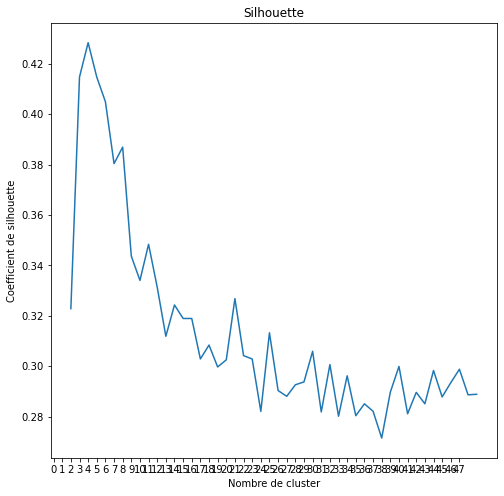

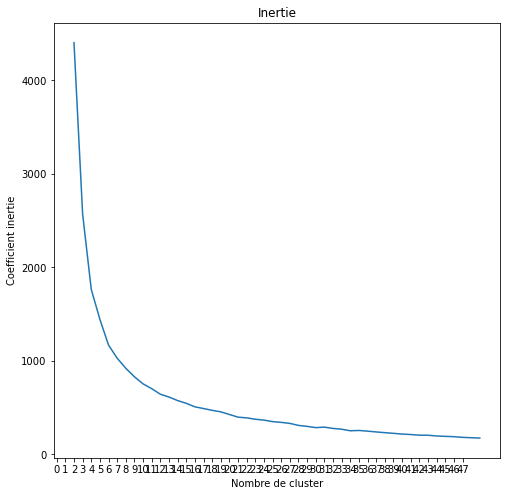

In [160]:
cp = crd
kms(cp)

#### 4 cluster me semble le plus adequoi car son scores silhouette et le plus proche de 0.5 (on aurait aimer que 0.5 soit depasser) et son coefficient d'inertie est assez bas il serait aussi interessant observer 8 groupe par contre plus d'overlappin seront present

# 1.

In [161]:
kms_2(cp,4,8)

Cerne_Surface  Cerne_Haralick_Contraste  \
Ville   AGE Age_BIN                                            
Europe  25  L              71541.0                    1.8669   
        28  L              89193.5                    4.2191   
        57  H              44993.5                    2.1424   
        23  L              37159.5                    3.3100   
        55  H             182202.5                    3.8090   
...                            ...                       ...   
Shangai 58  H              79881.5                    7.8976   
Shenzen 59  H              22257.5                    4.6232   
Shangai 57  H              67730.5                    5.8096   
        59  H                  0.0                    4.8244   
        24  L              45578.0                    3.0343   

                     Cerne_Haralick_Entropie  Cerne_Rugosite_Rt  \
Ville   AGE Age_BIN                                               
Europe  25  L                         5.6292              103.5   
        28  L                         5.9259               96.5   
        57  H                         5.3528              100.0   
        23  L                         5.9635              112.0   
        55  H                         6.0859              104.5   
...                                      ...                ...   
Shangai 58  H                         6.4934              121.0   
Shenzen 59  H                         5.8537              117.0   
Shangai 57  H                         6.1625              113.0   
        59  H                         5.8134              127.0   
        24  L                         5.4643               74.0   

                     Cerne_Rugosite_Ra  Cerne_Orientation_Aniso  Cerne_H76  \
Ville   AGE Age_BIN                                                          
Europe  25  L                  12.5397                   8.9513     5.4579   
        28  L                  11.7330                  11.8962     4.2646   
        57  H                   9.0888                   7.7184     4.0401   
        23  L                  12.3705                  14.4397     3.8183   
        55  H                  12.0235                  10.8535     5.8068   
...                                ...                      ...        ...   
Shangai 58  H                  12.6881                   7.9492     5.0041   
Shenzen 59  H                   9.4606                   9.9207     4.1151   
Shangai 57  H                  10.7707                   8.8858     4.6609   
        59  H                   8.0854                   9.0966     0.0000   
        24  L                   7.7348                  11.3514     3.2186   

                     Cerne_Contraste_dL  Cerne_Contraste_da  \
Ville   AGE Age_BIN                                           
Europe  25  L                   14.4782              1.3230   
        28  L                   18.2627              0.9105   
        57  H                   12.1515              3.4334   
        23  L                   15.1668              1.8477   
        55  H                    9.9939              0.9198   
...                                 ...                 ...   
Shangai 58  H                   20.5832              0.9763   
Shenzen 59  H                   20.0899              4.4449   
Shangai 57  H                   14.8233              3.2078   
        59  H                    0.0000              0.0000   
        24  L                    9.1244              1.7223   

                     Cerne_Contraste_db  ...  Paup_IWA  Paup_H76  \
Ville   AGE Age_BIN                      ...                       
Europe  25  L                    2.1989  ...   75.1704    7.1162   
        28  L                    2.0810  ...   61.7410    6.6843   
        57  H                    3.0932  ...   72.9530    7.6134   
        23  L                    0.5061  ...   73.6508    7.8988   
        55  H                    0.4292  ...   69.4875    8.9338   
...  

Cerne_Surface  Cerne_Haralick_Contraste  \
Ville   AGE Age_BIN                                            
Europe  25  L              71541.0                    1.8669   
        28  L              89193.5                    4.2191   
        57  H              44993.5                    2.1424   
        23  L              37159.5                    3.3100   
        55  H             182202.5                    3.8090   
...                            ...                       ...   
Shangai 58  H              79881.5                    7.8976   
Shenzen 59  H              22257.5                    4.6232   
Shangai 57  H              67730.5                    5.8096   
        59  H                  0.0                    4.8244   
        24  L              45578.0                    3.0343   

                     Cerne_Haralick_Entropie  Cerne_Rugosite_Rt  \
Ville   AGE Age_BIN                                               
Europe  25  L                         5.6292              103.5   
        28  L                         5.9259               96.5   
        57  H                         5.3528              100.0   
        23  L                         5.9635              112.0   
        55  H                         6.0859              104.5   
...                                      ...                ...   
Shangai 58  H                         6.4934              121.0   
Shenzen 59  H                         5.8537              117.0   
Shangai 57  H                         6.1625              113.0   
        59  H                         5.8134              127.0   
        24  L                         5.4643               74.0   

                     Cerne_Rugosite_Ra  Cerne_Orientation_Aniso  Cerne_H76  \
Ville   AGE Age_BIN                                                          
Europe  25  L                  12.5397                   8.9513     5.4579   
        28  L                  11.7330                  11.8962     4.2646   
        57  H                   9.0888                   7.7184     4.0401   
        23  L                  12.3705                  14.4397     3.8183   
        55  H                  12.0235                  10.8535     5.8068   
...                                ...                      ...        ...   
Shangai 58  H                  12.6881                   7.9492     5.0041   
Shenzen 59  H                   9.4606                   9.9207     4.1151   
Shangai 57  H                  10.7707                   8.8858     4.6609   
        59  H                   8.0854                   9.0966     0.0000   
        24  L                   7.7348                  11.3514     3.2186   

                     Cerne_Contraste_dL  Cerne_Contraste_da  \
Ville   AGE Age_BIN                                           
Europe  25  L                   14.4782              1.3230   
        28  L                   18.2627              0.9105   
        57  H                   12.1515              3.4334   
        23  L                   15.1668              1.8477   
        55  H                    9.9939              0.9198   
...                                 ...                 ...   
Shangai 58  H                   20.5832              0.9763   
Shenzen 59  H                   20.0899              4.4449   
Shangai 57  H                   14.8233              3.2078   
        59  H                    0.0000              0.0000   
        24  L                    9.1244              1.7223   

                     Cerne_Contraste_db  ...  Paup_IWA  Paup_H76  \
Ville   AGE Age_BIN                      ...                       
Europe  25  L                    2.1989  ...   75.1704    7.1162   
        28  L                    2.0810  ...   61.7410    6.6843   
        57  H                    3.0932  ...   72.9530    7.6134   
        23  L                    0.5061  ...   73.6508    7.8988   
        55  H                    0.4292  ...   69.4875    8.9338   
...  

In [162]:
cau_4 = df_4
cau_8 = df_8

0.7322367668373894


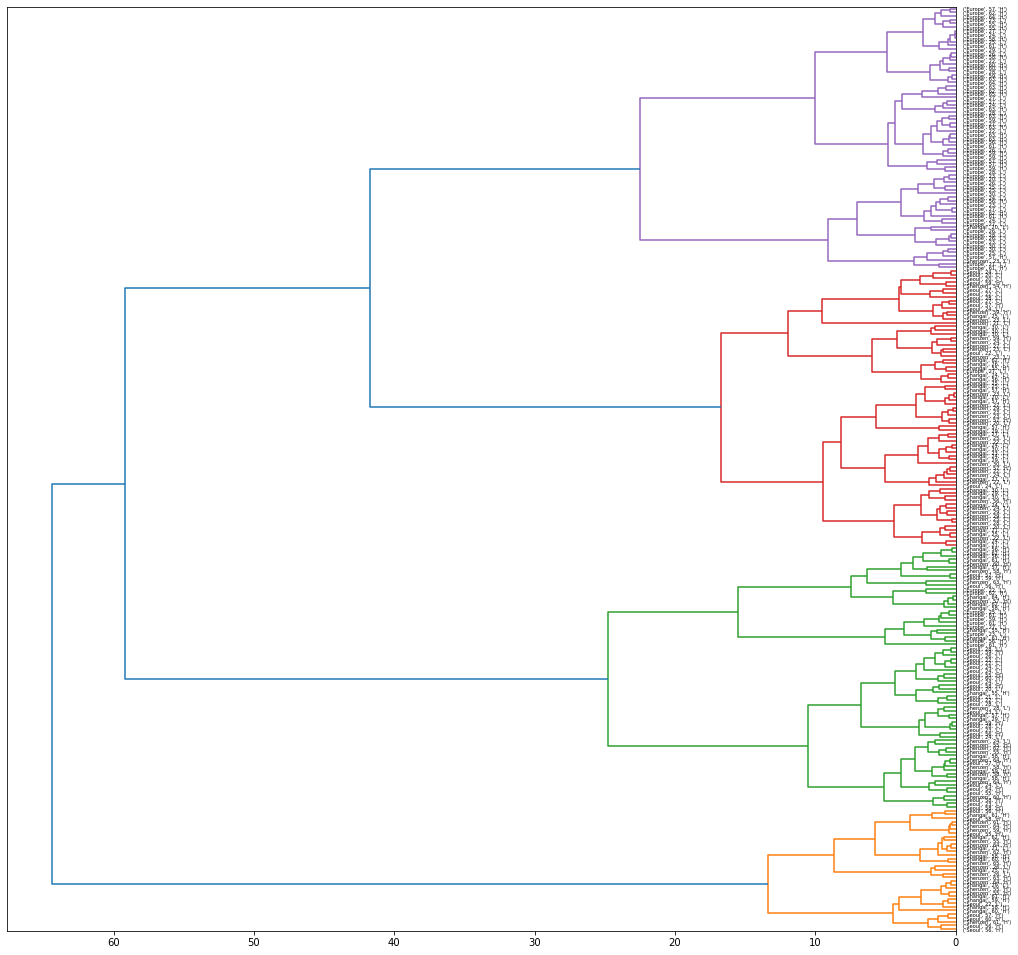

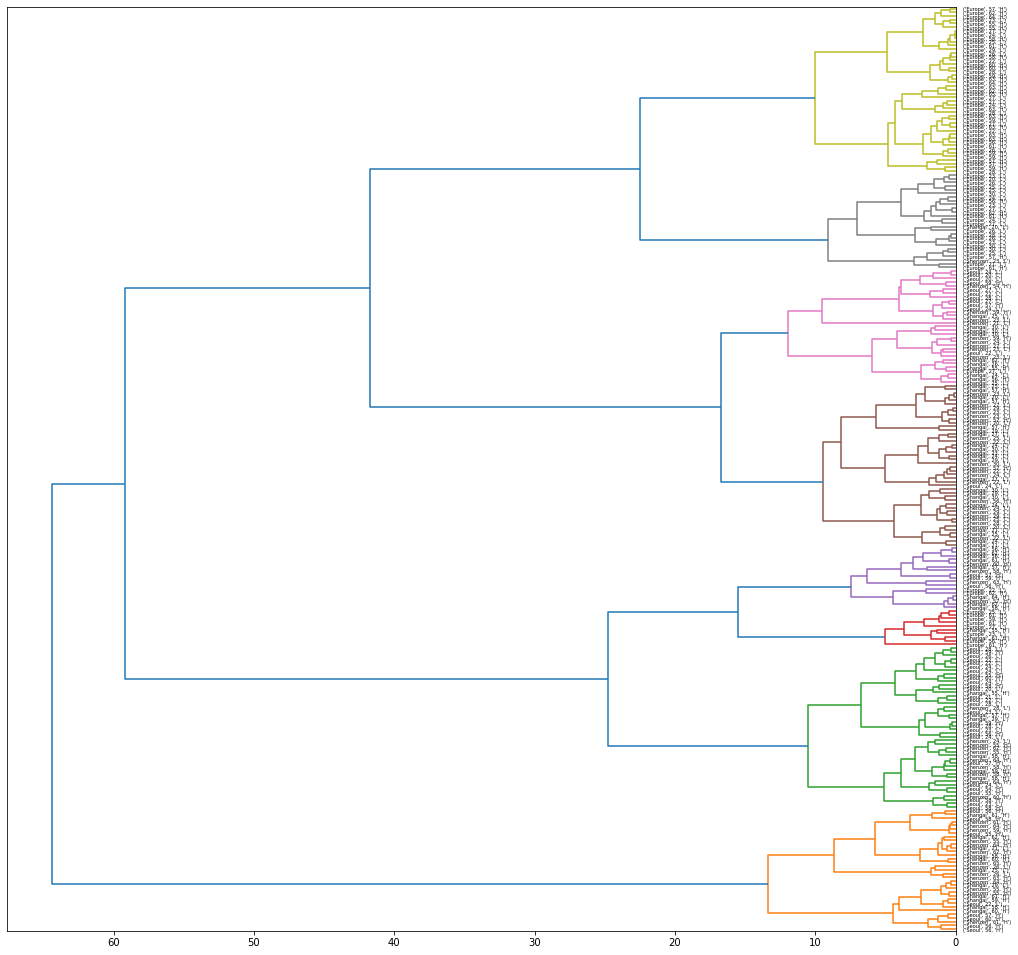

In [163]:
cah(cp, df)

# Asiatique

In [164]:
a1 = df.loc['Shangai']
a2 = df.loc['Shenzen']
a3 = df.loc['Seoul']

frames = [a1, a2, a3]
asie = pd.concat(frames)

asie


,,Cerne_Surface,Cerne_Haralick_Contraste,Cerne_Haralick_Entropie,Cerne_Rugosite_Rt,Cerne_Rugosite_Ra,Cerne_Orientation_Aniso,Cerne_H76,Cerne_Contraste_dL,Cerne_Contraste_da,Cerne_Contraste_db,...,Paup_ITA,Paup_IWA,Paup_H76,Paup_Haralick_Contraste,Paup_Halarick_Entropie,Paup_Halarick_Rt,Paup_Halarick_Ra,Paup_Orientation_Aniso,Paup_Surf,Paup_Hauteur
AGE,Age_BIN,,,,,,,,,,,,,,,,,,,,,
58,H,0.0,3.5309,5.6632,122.0,8.9433,8.3991,0.0000,0.0000,0.0000,0.0000,...,13.0788,59.0124,7.3520,8.7229,6.4572,211.0,17.5792,13.3921,433862.0,436.9015
55,H,88889.0,6.5805,6.3398,138.0,12.3309,13.5120,5.8950,12.2621,8.3112,1.2812,...,10.0630,60.6818,6.8842,10.1131,6.6846,178.5,16.5688,9.7838,343729.5,346.2185
21,L,0.0,3.6018,5.6643,121.0,9.4287,11.5168,0.0000,0.0000,0.0000,0.0000,...,12.0937,61.0827,7.9789,7.7694,6.7490,214.0,19.8124,17.2439,394045.0,403.0315
20,L,67315.5,3.1074,5.6448,74.5,8.9085,11.5362,3.4031,10.9639,1.4478,1.8717,...,17.4862,64.1913,7.2973,12.0959,6.7392,221.5,18.5221,12.6264,347716.0,373.6855
58,H,0.0,6.6639,6.3590,145.0,12.1856,11.6431,0.0000,0.0000,0.0000,0.0000,...,5.8173,56.1257,6.3236,9.1378,6.5922,213.0,15.9573,12.3325,403020.5,389.9925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,H,25949.0,3.8029,5.9170,130.0,11.4951,9.1636,4.6698,21.3790,3.6086,0.7341,...,15.1371,60.5930,7.2588,6.1907,6.3881,194.0,17.2071,10.9553,500904.0,484.8740
28,L,38313.5,3.2954,5.7446,140.5,9.8306,10.1923,4.6730,19.5382,4.8367,6.0550,...,18.3905,59.5587,5.8942,5.3092,6.0802,197.0,15.1850,18.1494,432355.0,427.8100
21,L,59839.5,5.6237,6.2256,111.0,12.0803,11.6869,3.0929,19.2239,4.6727,3.4681,...,3.6086,55.1040,8.6841,6.9126,6.6122,222.0,20.2726,9.1075,430194.0,456.9020


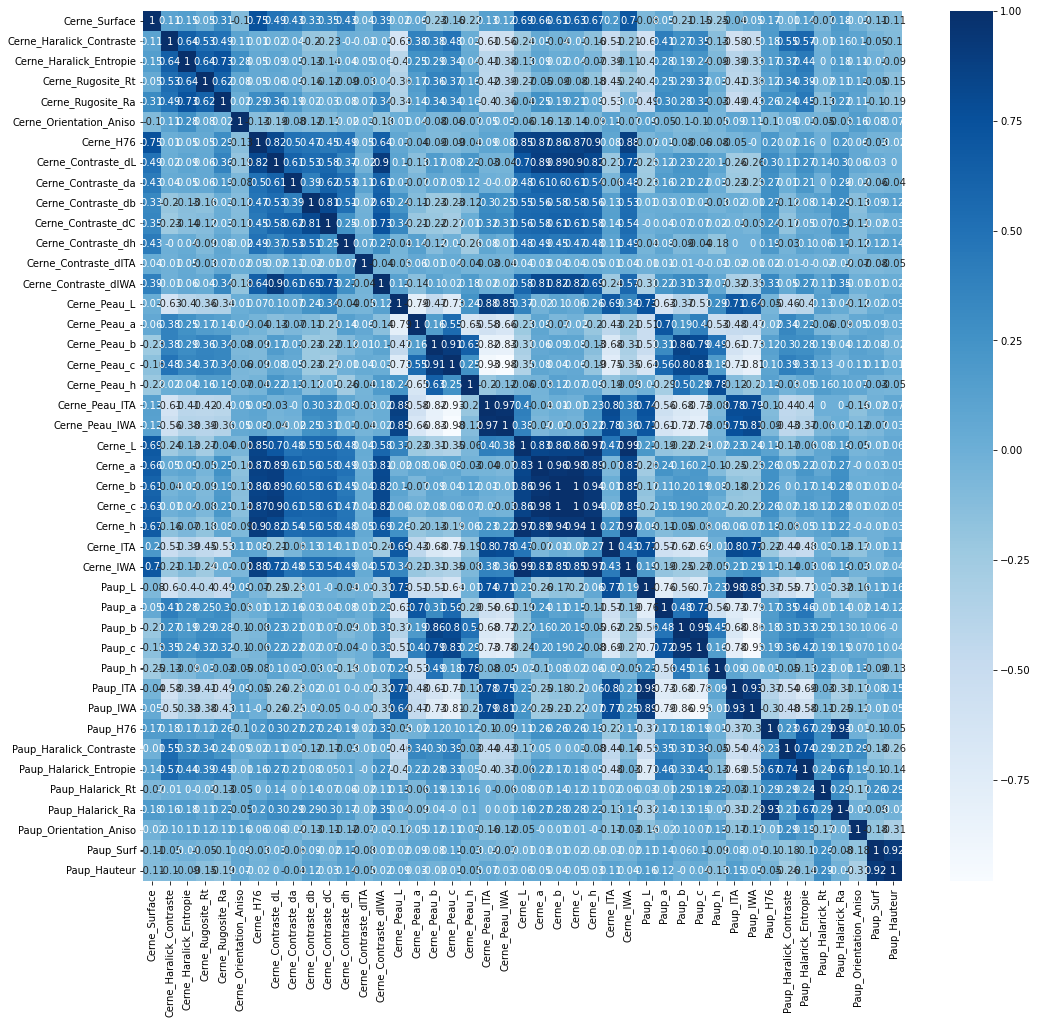

StandardScaler 
 -1.321939973507163e-16
1.0

 RobustScaler 
 -0.06650036416970188
1.0031660022796387

 
 On choisira le StandarScaler car il mieux centre et normaliser
43  composants

 

[2.68721286e-01 2.02640156e-01 1.33257729e-01 5.77301327e-02
 5.03546009e-02 4.64780971e-02 3.05376605e-02 2.94044658e-02
 2.80610011e-02 2.01619682e-02 1.91731457e-02 1.65991101e-02
 1.47941439e-02 1.45088142e-02 1.23732318e-02 1.04051967e-02
 8.46506649e-03 6.06970185e-03 5.72666589e-03 5.01493278e-03
 3.99766997e-03 3.02878747e-03 2.17287684e-03 1.99053578e-03
 1.46270747e-03 1.30792174e-03 1.11360601e-03 1.01544015e-03
 8.65870152e-04 8.04710915e-04 6.64683842e-04 4.68785769e-04
 2.20391146e-04 1.54324636e-04 1.13915506e-04 4.97687448e-05
 3.03240602e-05 2.70415503e-05 1.52627092e-05 8.64101953e-06
 5.84098014e-06 2.83104404e-06 9.55603173e-07] 

[1.16014210e+01 8.74852080e+00 5.75309472e+00 2.49236516e+00
 2.17394361e+00 2.00658452e+00 1.31839297e+00 1.26946991e+00
 1.21146892e+00 8.70446420e-01 8

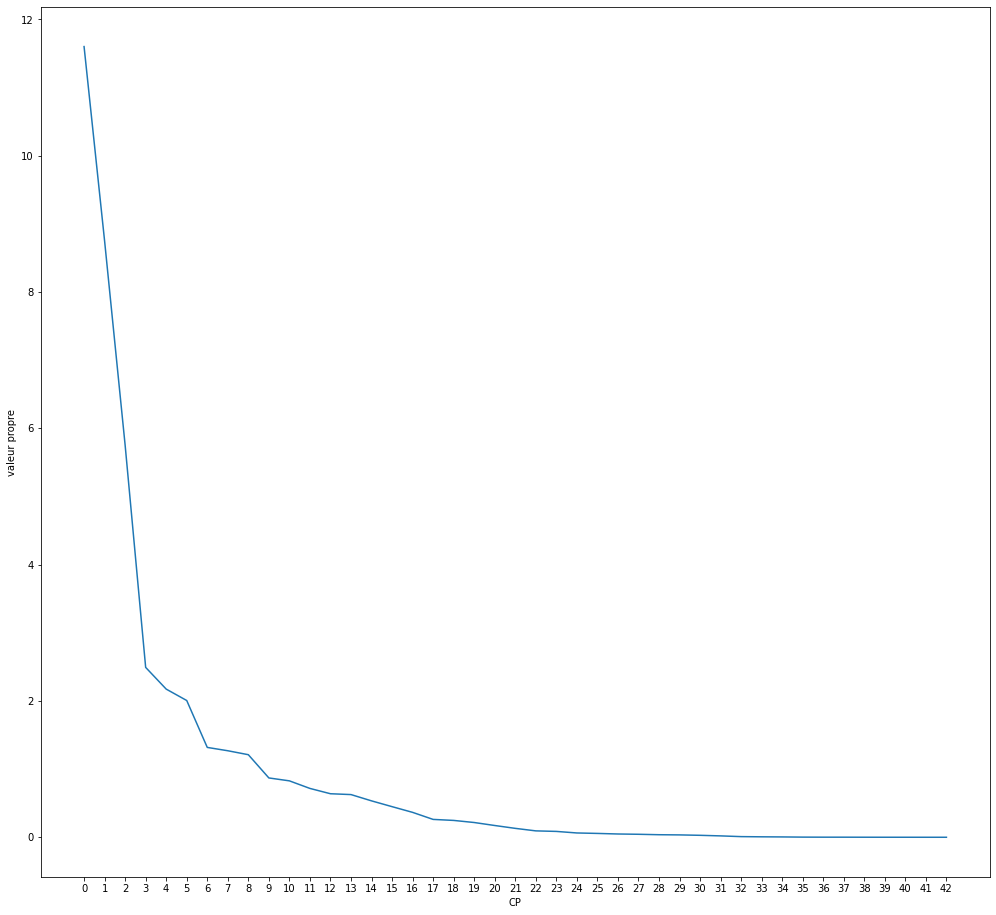

In [165]:
co(asie)
scaler(asie)
a_s = dfs
pca(a_s)

#### selection du nombre de composant selon le gain d'information

[[-6.18124186e+00  1.22130454e+00  6.52415701e-01]
 [-3.68021370e-01 -1.13626506e+00 -1.76959487e+00]
 [-5.50732646e+00  1.42693864e+00  7.05267727e-01]
 [-5.04096411e+00  8.42429253e-01 -1.58078890e+00]
 [-3.48941806e+00 -2.29696949e-01 -2.69761359e+00]
 [-3.46331807e+00 -1.34646850e+00 -3.17955804e+00]
 [-1.16938328e+00 -3.49420953e-01 -1.40065298e+00]
 [ 3.33744946e+00 -2.59919810e+00 -4.91944864e+00]
 [-3.01335462e+00 -1.70708157e+00 -1.80866594e+00]
 [-6.10511172e-02 -4.09188100e-01 -7.14397761e-01]
 [-3.88345911e+00  7.21080675e-01 -2.36017911e+00]
 [-6.70072564e+00  1.83660985e+00  1.59454258e+00]
 [-6.54299530e+00  1.37403198e+00 -9.68331638e-01]
 [ 9.20495371e-01 -2.11792285e+00 -3.29618182e+00]
 [-3.67958628e+00  3.90153241e-01 -1.42786954e+00]
 [-2.82512308e+00 -8.89512252e-01 -3.85345170e+00]
 [-4.91745173e+00 -5.45944136e-01 -1.20909409e+00]
 [-4.13252597e+00  9.38356018e-01  6.51499651e-01]
 [-1.64303350e+00 -1.30587880e+00 -2.57925442e+00]
 [-1.94793238e+00 -7.84833343e-

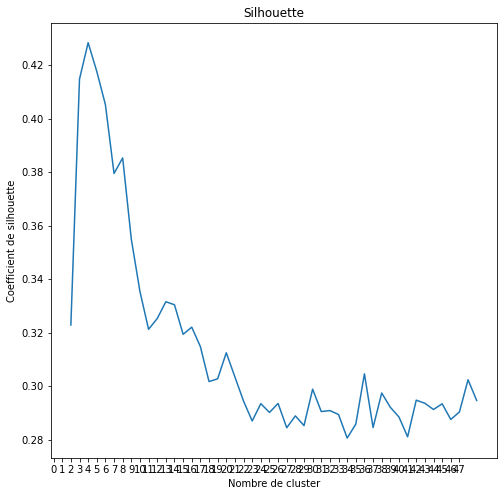

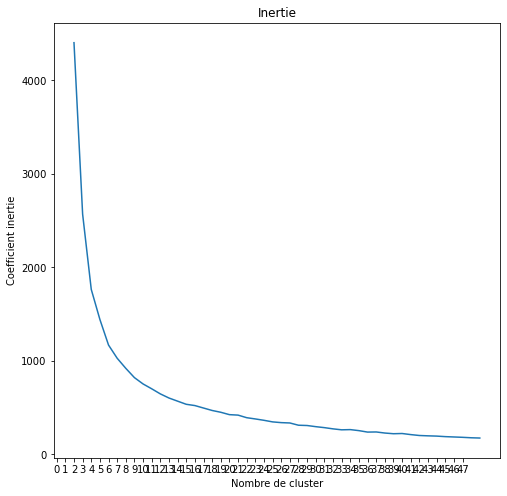

In [166]:
pca_2(a_s,3)
ap = crd
kms(ap)

#### 4 cluster me semble le plus adequoi car son scores silhouette et le plus proche de 0.5 (on aurait aimer que 0.5 soit depasser) et son coefficient d'inertie est assez bas il serait aussi interessant observer 8 groupe par contre plus d'overlappin seront present

# 1.

In [167]:
kms_2(ap,4,8)

Cerne_Surface  Cerne_Haralick_Contraste  \
Ville   AGE Age_BIN                                            
Europe  25  L              71541.0                    1.8669   
        28  L              89193.5                    4.2191   
        57  H              44993.5                    2.1424   
        23  L              37159.5                    3.3100   
        55  H             182202.5                    3.8090   
...                            ...                       ...   
Shangai 58  H              79881.5                    7.8976   
Shenzen 59  H              22257.5                    4.6232   
Shangai 57  H              67730.5                    5.8096   
        59  H                  0.0                    4.8244   
        24  L              45578.0                    3.0343   

                     Cerne_Haralick_Entropie  Cerne_Rugosite_Rt  \
Ville   AGE Age_BIN                                               
Europe  25  L                         5.6292              103.5   
        28  L                         5.9259               96.5   
        57  H                         5.3528              100.0   
        23  L                         5.9635              112.0   
        55  H                         6.0859              104.5   
...                                      ...                ...   
Shangai 58  H                         6.4934              121.0   
Shenzen 59  H                         5.8537              117.0   
Shangai 57  H                         6.1625              113.0   
        59  H                         5.8134              127.0   
        24  L                         5.4643               74.0   

                     Cerne_Rugosite_Ra  Cerne_Orientation_Aniso  Cerne_H76  \
Ville   AGE Age_BIN                                                          
Europe  25  L                  12.5397                   8.9513     5.4579   
        28  L                  11.7330                  11.8962     4.2646   
        57  H                   9.0888                   7.7184     4.0401   
        23  L                  12.3705                  14.4397     3.8183   
        55  H                  12.0235                  10.8535     5.8068   
...                                ...                      ...        ...   
Shangai 58  H                  12.6881                   7.9492     5.0041   
Shenzen 59  H                   9.4606                   9.9207     4.1151   
Shangai 57  H                  10.7707                   8.8858     4.6609   
        59  H                   8.0854                   9.0966     0.0000   
        24  L                   7.7348                  11.3514     3.2186   

                     Cerne_Contraste_dL  Cerne_Contraste_da  \
Ville   AGE Age_BIN                                           
Europe  25  L                   14.4782              1.3230   
        28  L                   18.2627              0.9105   
        57  H                   12.1515              3.4334   
        23  L                   15.1668              1.8477   
        55  H                    9.9939              0.9198   
...                                 ...                 ...   
Shangai 58  H                   20.5832              0.9763   
Shenzen 59  H                   20.0899              4.4449   
Shangai 57  H                   14.8233              3.2078   
        59  H                    0.0000              0.0000   
        24  L                    9.1244              1.7223   

                     Cerne_Contraste_db  ...  Paup_IWA  Paup_H76  \
Ville   AGE Age_BIN                      ...                       
Europe  25  L                    2.1989  ...   75.1704    7.1162   
        28  L                    2.0810  ...   61.7410    6.6843   
        57  H                    3.0932  ...   72.9530    7.6134   
        23  L                    0.5061  ...   73.6508    7.8988   
        55  H                    0.4292  ...   69.4875    8.9338   
...  

Cerne_Surface  Cerne_Haralick_Contraste  \
Ville   AGE Age_BIN                                            
Europe  25  L              71541.0                    1.8669   
        28  L              89193.5                    4.2191   
        57  H              44993.5                    2.1424   
        23  L              37159.5                    3.3100   
        55  H             182202.5                    3.8090   
...                            ...                       ...   
Shangai 58  H              79881.5                    7.8976   
Shenzen 59  H              22257.5                    4.6232   
Shangai 57  H              67730.5                    5.8096   
        59  H                  0.0                    4.8244   
        24  L              45578.0                    3.0343   

                     Cerne_Haralick_Entropie  Cerne_Rugosite_Rt  \
Ville   AGE Age_BIN                                               
Europe  25  L                         5.6292              103.5   
        28  L                         5.9259               96.5   
        57  H                         5.3528              100.0   
        23  L                         5.9635              112.0   
        55  H                         6.0859              104.5   
...                                      ...                ...   
Shangai 58  H                         6.4934              121.0   
Shenzen 59  H                         5.8537              117.0   
Shangai 57  H                         6.1625              113.0   
        59  H                         5.8134              127.0   
        24  L                         5.4643               74.0   

                     Cerne_Rugosite_Ra  Cerne_Orientation_Aniso  Cerne_H76  \
Ville   AGE Age_BIN                                                          
Europe  25  L                  12.5397                   8.9513     5.4579   
        28  L                  11.7330                  11.8962     4.2646   
        57  H                   9.0888                   7.7184     4.0401   
        23  L                  12.3705                  14.4397     3.8183   
        55  H                  12.0235                  10.8535     5.8068   
...                                ...                      ...        ...   
Shangai 58  H                  12.6881                   7.9492     5.0041   
Shenzen 59  H                   9.4606                   9.9207     4.1151   
Shangai 57  H                  10.7707                   8.8858     4.6609   
        59  H                   8.0854                   9.0966     0.0000   
        24  L                   7.7348                  11.3514     3.2186   

                     Cerne_Contraste_dL  Cerne_Contraste_da  \
Ville   AGE Age_BIN                                           
Europe  25  L                   14.4782              1.3230   
        28  L                   18.2627              0.9105   
        57  H                   12.1515              3.4334   
        23  L                   15.1668              1.8477   
        55  H                    9.9939              0.9198   
...                                 ...                 ...   
Shangai 58  H                   20.5832              0.9763   
Shenzen 59  H                   20.0899              4.4449   
Shangai 57  H                   14.8233              3.2078   
        59  H                    0.0000              0.0000   
        24  L                    9.1244              1.7223   

                     Cerne_Contraste_db  ...  Paup_IWA  Paup_H76  \
Ville   AGE Age_BIN                      ...                       
Europe  25  L                    2.1989  ...   75.1704    7.1162   
        28  L                    2.0810  ...   61.7410    6.6843   
        57  H                    3.0932  ...   72.9530    7.6134   
        23  L                    0.5061  ...   73.6508    7.8988   
        55  H                    0.4292  ...   69.4875    8.9338   
...  

In [168]:
asi_4 = df_4
asi_8 = df_8

0.7322367668373894


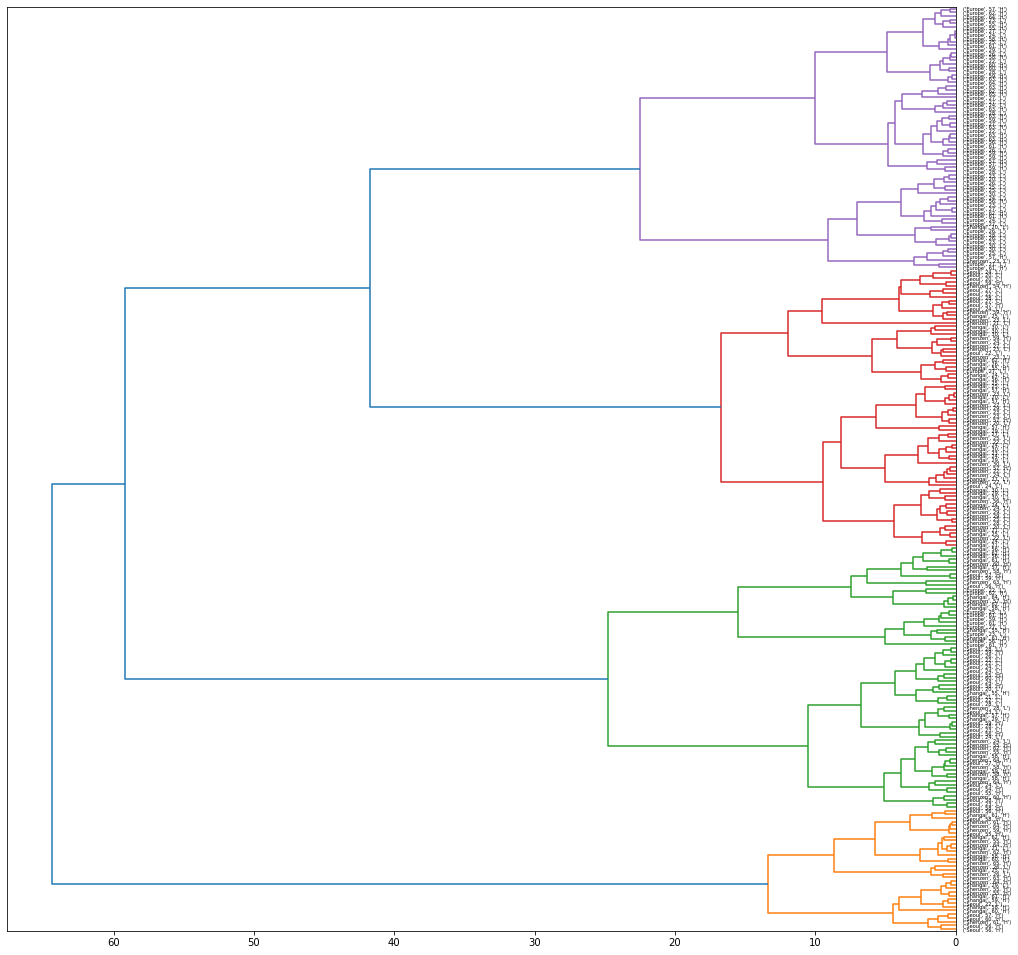

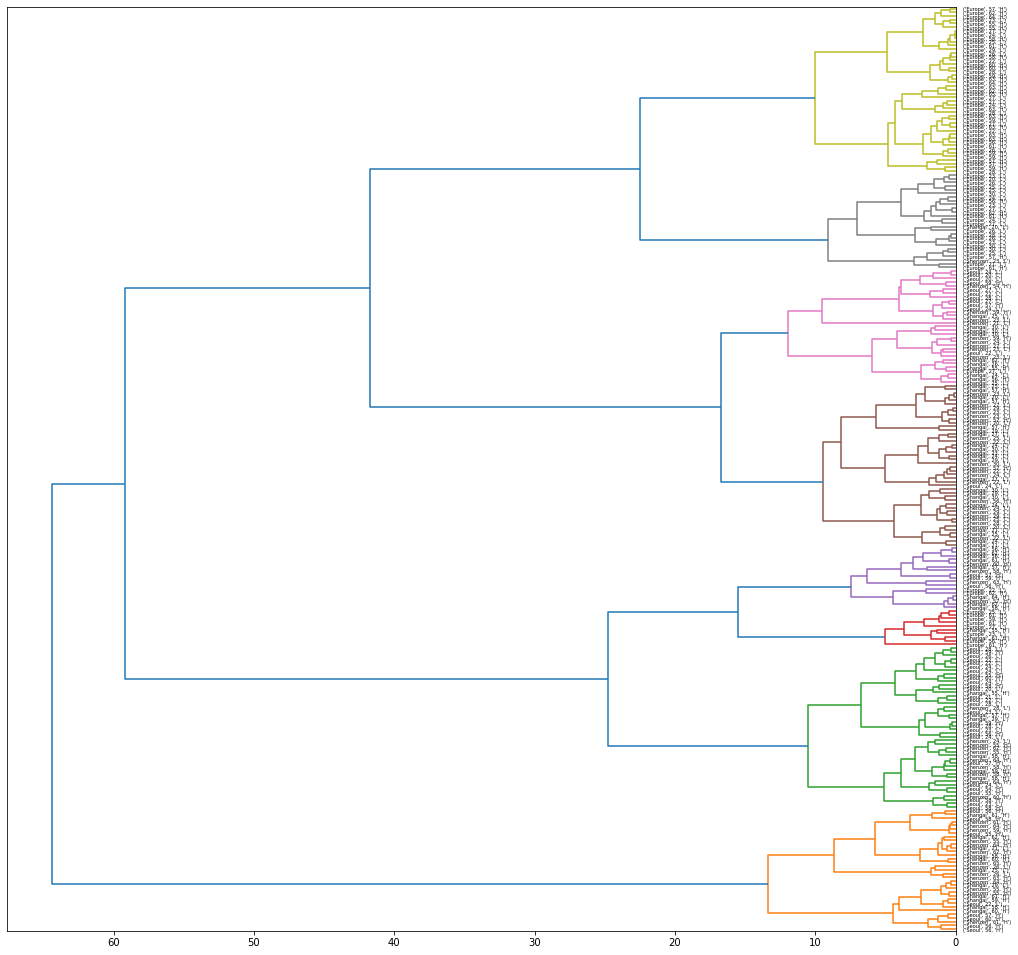

In [169]:
cah(ap, df)

### validation et caracterisation

In [172]:
def valicar(df):
    m = df.mean()

    shape = df.shape[0]
    variance = df.var(ddof=0)

    TSS = df.shape[0]*df.var(ddof=0)
    print(shape)
    print(variance)
    print(TSS)


    gb = df.groupby(['cluster'])

    nk = gb.size()
    print('\n','nk')
    print(nk)


    mk = gb.mean()
    print('mk')
    print(mk)


    EMk = (mk-m)**2

    EM = EMk.multiply(nk,axis=0)

    BSS = np.sum(EM,axis=0)
    print('BSS')
    display(BSS)
    print('')

    
    R2 = BSS/TSS
    display('R2')
    print(R2)

In [173]:
valicar(cau_4)
print('##############################################################################')
valicar(cau_8)
print('##############################################################################')
valicar(asi_4)
print('##############################################################################')
valicar(asi_8)
print('##############################################################################')

250
Cerne_Surface               2.363106e+09
Cerne_Haralick_Contraste    2.679303e+00
Cerne_Haralick_Entropie     2.434705e-01
Cerne_Rugosite_Rt           4.431046e+02
Cerne_Rugosite_Ra           7.989624e+00
Cerne_Orientation_Aniso     5.177875e+00
Cerne_H76                   3.481819e+00
Cerne_Contraste_dL          3.659585e+01
Cerne_Contraste_da          3.485057e+00
Cerne_Contraste_db          4.433410e+00
Cerne_Contraste_dC          5.182022e+00
Cerne_Contraste_dh          1.146453e+01
Cerne_Contraste_dITA        1.853950e+02
Cerne_Contraste_dIWA        1.589668e+01
Cerne_Peau_L                1.384602e+01
Cerne_Peau_a                1.039134e+01
Cerne_Peau_b                3.363956e+01
Cerne_Peau_c                2.882336e+01
Cerne_Peau_h                6.501277e+01
Cerne_Peau_ITA              1.120375e+02
Cerne_Peau_IWA              2.118795e+01
Cerne_L                     3.540200e+02
Cerne_a                     4.044686e+01
Cerne_b                     9.227003e+01
Cerne_c     

Cerne_Contraste_dC          3.177681e+02
Cerne_Contraste_dITA        2.908793e+04
Cerne_Contraste_dIWA        1.971649e+03
Cerne_Contraste_dL          6.134091e+03
Cerne_Contraste_da          2.209343e+02
Cerne_Contraste_db          2.832864e+02
Cerne_Contraste_dh          5.512725e+02
Cerne_H76                   6.909370e+02
Cerne_Haralick_Contraste    1.826396e+02
Cerne_Haralick_Entropie     1.063481e+01
Cerne_ITA                   2.399182e+04
Cerne_IWA                   1.164239e+05
Cerne_L                     8.341195e+04
Cerne_Orientation_Aniso     7.419883e+01
Cerne_Peau_ITA              1.580399e+04
Cerne_Peau_IWA              3.077735e+03
Cerne_Peau_L                1.303737e+03
Cerne_Peau_a                4.320133e+02
Cerne_Peau_b                5.064703e+03
Cerne_Peau_c                4.339586e+03
Cerne_Peau_h                5.771054e+03
Cerne_Rugosite_Ra           6.622330e+02
Cerne_Rugosite_Rt           1.910705e+04
Cerne_Surface               2.888749e+11
Cerne_a         

'R2'

Cerne_Contraste_dC          0.245285
Cerne_Contraste_dITA        0.627588
Cerne_Contraste_dIWA        0.496116
Cerne_Contraste_dL          0.670469
Cerne_Contraste_da          0.253579
Cerne_Contraste_db          0.255592
Cerne_Contraste_dh          0.192340
Cerne_H76                   0.793765
Cerne_Haralick_Contraste    0.272667
Cerne_Haralick_Entropie     0.174720
Cerne_ITA                   0.514277
Cerne_IWA                   0.950340
Cerne_L                     0.942455
Cerne_Orientation_Aniso     0.057320
Cerne_Peau_ITA              0.564239
Cerne_Peau_IWA              0.581035
Cerne_Peau_L                0.376639
Cerne_Peau_a                0.166297
Cerne_Peau_b                0.602232
Cerne_Peau_c                0.602232
Cerne_Peau_h                0.355072
Cerne_Rugosite_Ra           0.331547
Cerne_Rugosite_Rt           0.172483
Cerne_Surface               0.488975
Cerne_a                     0.872751
Cerne_b                     0.864583
Cerne_c                     0.887351
C

Cerne_Contraste_dC          3.442132e+02
Cerne_Contraste_dITA        3.029111e+04
Cerne_Contraste_dIWA        2.320407e+03
Cerne_Contraste_dL          6.510799e+03
Cerne_Contraste_da          2.442518e+02
Cerne_Contraste_db          2.878182e+02
Cerne_Contraste_dh          6.173981e+02
Cerne_H76                   7.378292e+02
Cerne_Haralick_Contraste    2.977091e+02
Cerne_Haralick_Entropie     1.753133e+01
Cerne_ITA                   3.451374e+04
Cerne_IWA                   1.187347e+05
Cerne_L                     8.497728e+04
Cerne_Orientation_Aniso     9.927796e+01
Cerne_Peau_ITA              1.986262e+04
Cerne_Peau_IWA              3.670155e+03
Cerne_Peau_L                1.957639e+03
Cerne_Peau_a                6.500617e+02
Cerne_Peau_b                5.802534e+03
Cerne_Peau_c                5.053716e+03
Cerne_Peau_h                6.456868e+03
Cerne_Rugosite_Ra           9.224915e+02
Cerne_Rugosite_Rt           3.030397e+04
Cerne_Surface               4.168453e+11
Cerne_a         

'R2'

Cerne_Contraste_dC          0.265698
Cerne_Contraste_dITA        0.653547
Cerne_Contraste_dIWA        0.583872
Cerne_Contraste_dL          0.711643
Cerne_Contraste_da          0.280342
Cerne_Contraste_db          0.259681
Cerne_Contraste_dh          0.215412
Cerne_H76                   0.847636
Cerne_Haralick_Contraste    0.444458
Cerne_Haralick_Entropie     0.288024
Cerne_ITA                   0.739819
Cerne_IWA                   0.969203
Cerne_L                     0.960141
Cerne_Orientation_Aniso     0.076694
Cerne_Peau_ITA              0.709142
Cerne_Peau_IWA              0.692876
Cerne_Peau_L                0.565545
Cerne_Peau_a                0.250232
Cerne_Peau_b                0.689965
Cerne_Peau_c                0.701336
Cerne_Peau_h                0.397268
Cerne_Rugosite_Ra           0.461845
Cerne_Rugosite_Rt           0.273560
Cerne_Surface               0.705589
Cerne_a                     0.902571
Cerne_b                     0.909424
Cerne_c                     0.925567
C

Cerne_Contraste_dC          3.177681e+02
Cerne_Contraste_dITA        2.908793e+04
Cerne_Contraste_dIWA        1.971649e+03
Cerne_Contraste_dL          6.134091e+03
Cerne_Contraste_da          2.209343e+02
Cerne_Contraste_db          2.832864e+02
Cerne_Contraste_dh          5.512725e+02
Cerne_H76                   6.909370e+02
Cerne_Haralick_Contraste    1.826396e+02
Cerne_Haralick_Entropie     1.063481e+01
Cerne_ITA                   2.399182e+04
Cerne_IWA                   1.164239e+05
Cerne_L                     8.341195e+04
Cerne_Orientation_Aniso     7.419883e+01
Cerne_Peau_ITA              1.580399e+04
Cerne_Peau_IWA              3.077735e+03
Cerne_Peau_L                1.303737e+03
Cerne_Peau_a                4.320133e+02
Cerne_Peau_b                5.064703e+03
Cerne_Peau_c                4.339586e+03
Cerne_Peau_h                5.771054e+03
Cerne_Rugosite_Ra           6.622330e+02
Cerne_Rugosite_Rt           1.910705e+04
Cerne_Surface               2.888749e+11
Cerne_a         

'R2'

Cerne_Contraste_dC          0.245285
Cerne_Contraste_dITA        0.627588
Cerne_Contraste_dIWA        0.496116
Cerne_Contraste_dL          0.670469
Cerne_Contraste_da          0.253579
Cerne_Contraste_db          0.255592
Cerne_Contraste_dh          0.192340
Cerne_H76                   0.793765
Cerne_Haralick_Contraste    0.272667
Cerne_Haralick_Entropie     0.174720
Cerne_ITA                   0.514277
Cerne_IWA                   0.950340
Cerne_L                     0.942455
Cerne_Orientation_Aniso     0.057320
Cerne_Peau_ITA              0.564239
Cerne_Peau_IWA              0.581035
Cerne_Peau_L                0.376639
Cerne_Peau_a                0.166297
Cerne_Peau_b                0.602232
Cerne_Peau_c                0.602232
Cerne_Peau_h                0.355072
Cerne_Rugosite_Ra           0.331547
Cerne_Rugosite_Rt           0.172483
Cerne_Surface               0.488975
Cerne_a                     0.872751
Cerne_b                     0.864583
Cerne_c                     0.887351
C

Cerne_Contraste_dC          3.442132e+02
Cerne_Contraste_dITA        3.029111e+04
Cerne_Contraste_dIWA        2.320407e+03
Cerne_Contraste_dL          6.510799e+03
Cerne_Contraste_da          2.442518e+02
Cerne_Contraste_db          2.878182e+02
Cerne_Contraste_dh          6.173981e+02
Cerne_H76                   7.378292e+02
Cerne_Haralick_Contraste    2.977091e+02
Cerne_Haralick_Entropie     1.753133e+01
Cerne_ITA                   3.451374e+04
Cerne_IWA                   1.187347e+05
Cerne_L                     8.497728e+04
Cerne_Orientation_Aniso     9.927796e+01
Cerne_Peau_ITA              1.986262e+04
Cerne_Peau_IWA              3.670155e+03
Cerne_Peau_L                1.957639e+03
Cerne_Peau_a                6.500617e+02
Cerne_Peau_b                5.802534e+03
Cerne_Peau_c                5.053716e+03
Cerne_Peau_h                6.456868e+03
Cerne_Rugosite_Ra           9.224915e+02
Cerne_Rugosite_Rt           3.030397e+04
Cerne_Surface               4.168453e+11
Cerne_a         

'R2'

Cerne_Contraste_dC          0.265698
Cerne_Contraste_dITA        0.653547
Cerne_Contraste_dIWA        0.583872
Cerne_Contraste_dL          0.711643
Cerne_Contraste_da          0.280342
Cerne_Contraste_db          0.259681
Cerne_Contraste_dh          0.215412
Cerne_H76                   0.847636
Cerne_Haralick_Contraste    0.444458
Cerne_Haralick_Entropie     0.288024
Cerne_ITA                   0.739819
Cerne_IWA                   0.969203
Cerne_L                     0.960141
Cerne_Orientation_Aniso     0.076694
Cerne_Peau_ITA              0.709142
Cerne_Peau_IWA              0.692876
Cerne_Peau_L                0.565545
Cerne_Peau_a                0.250232
Cerne_Peau_b                0.689965
Cerne_Peau_c                0.701336
Cerne_Peau_h                0.397268
Cerne_Rugosite_Ra           0.461845
Cerne_Rugosite_Rt           0.273560
Cerne_Surface               0.705589
Cerne_a                     0.902571
Cerne_b                     0.909424
Cerne_c                     0.925567
C

# 2.
#### que ca soit caucasiennes ou asiatiques que ca soit 4 cluster ou 8 groupe Le 3eme groupe donc cluster 2 n'ont pas de ride

cluster 0 est influencer fortement par tous les variables en generale

cluster 1 est influencer le plus par cerne_contraste_db

cluster 2 est moins influencer par tous les variables en generale et n'as pas de ride

cluster 3 est influencer le plus par cerne_contraste_dl